<a href="https://colab.research.google.com/github/shila121/projects/blob/main/Bank_transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Framing the Problem Statement

In [ ]:
# importing data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None, "display.max_columns", None)
import seaborn as sns

application_data = pd.read_csv('application_data.csv')
previous_application = pd.read_csv('previous_application.csv')
columns_description = pd.read_csv('columns_description.csv')


In [ ]:
# viewing the data

# display application data
print(application_data.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1     

In [ ]:
# display previous_application data
print(previous_application.head())

   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  

In [ ]:
# display columns_description data
print(columns_description.head())


   Unnamed: 0             Table                 Row  \
0           1  application_data          SK_ID_CURR   
1           2  application_data              TARGET   
2           5  application_data  NAME_CONTRACT_TYPE   
3           6  application_data         CODE_GENDER   
4           7  application_data        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN  


In [ ]:
# display data dimensions
print('application_data:',application_data.shape)
print('previous_application:',previous_application.shape)
print('columns_description:',columns_description.shape)

application_data: (307511, 122)
previous_application: (711982, 37)
columns_description: (160, 5)


In [ ]:
# display data columns
print('application_data columns:',application_data.columns,len(application_data.columns))
print('previous_application columns:',previous_application.columns,len(previous_application.columns))
print('columns_description columns:',columns_description.columns,len(columns_description.columns))


application_data columns: Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122) 122
previous_application columns: Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATU

# Analyse the 'previous_application' data

In [ ]:
# analyse presence of missing values in previous application
previous_application.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    157665
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_DOWN_PAYMENT               377618
AMT_GOODS_PRICE                162744
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              377618
RATE_INTEREST_PRIMARY          709450
RATE_INTEREST_PRIVILEGED       709450
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                349429
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 1
NAME_PORTFOLIO                      1
NAME_PRODUCT_TYPE                   1
CHANNEL_TYPE                        1
SELLERPLACE_

In [ ]:
# analyse percentage of  missing data in previous application
previous_application.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.144521
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               53.037577
AMT_GOODS_PRICE                22.857881
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.037577
RATE_INTEREST_PRIMARY          99.644373
RATE_INTEREST_PRIVILEGED       99.644373
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.078347
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000140
NAME_PORTFOLIO                  0.000140
NAME_PRODUCT_TYP

In [ ]:
# removing columns having more than 50% missing data
previous_application = previous_application.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'],axis = 1)



In [ ]:
# # Again analysing percentage of  missing data in previous application
previous_application.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.144521
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_GOODS_PRICE                22.857881
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.078347
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000140
NAME_PORTFOLIO                  0.000140
NAME_PRODUCT_TYPE               0.000140
CHANNEL_TYPE                    0.000140
SELLERPLACE_AREA                0.000140
NAME_SELLER_INDUSTRY            0.000140
CNT_PAYMENT     

157665
count    554317.000000
mean      15829.220782
std       14684.475846
min           0.000000
25%        6282.765000
50%       11241.000000
75%       20404.620000
max      418058.145000
Name: AMT_ANNUITY, dtype: float64


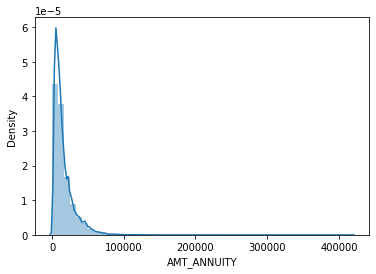

In [ ]:
# analysing the missing data:'AMT_ANNUITY'
print(previous_application['AMT_ANNUITY'].isnull().sum())

# display summary of the column:'AMT_ANNUITY'
print(previous_application['AMT_ANNUITY'].describe())

# display plot of column:'AMT_ANNUITY'
sns.distplot(previous_application['AMT_ANNUITY'])
plt.show()

# suggestion: we can fill this with mean

162744
count    5.492380e+05
mean     2.249488e+05
std      3.121906e+05
min      0.000000e+00
25%      5.030619e+04
50%      1.103040e+05
75%      2.295000e+05
max      4.237875e+06
Name: AMT_GOODS_PRICE, dtype: float64


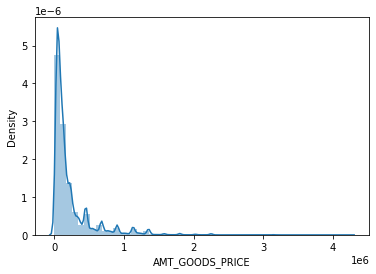

In [ ]:
# # analysing the missing data:'AMT_GOODS_PRICE'
print(previous_application['AMT_GOODS_PRICE'].isnull().sum())

# display summary of the column:'AMT_GOODS_PRICE'
print(previous_application['AMT_GOODS_PRICE'].describe())

# display plot of column:'AMT_GOODS_PRICE'
sns.distplot(previous_application['AMT_GOODS_PRICE'])
plt.show()

# suggestion: we can fill this with median

In [ ]:
# # analysing the missing data:'NAME_TYPE_SUITE' (//Categorical data)
print(previous_application['NAME_TYPE_SUITE'].isnull().sum())

# display summary of the column:'NAME_TYPE_SUITE'
print(previous_application['NAME_TYPE_SUITE'].value_counts())

# suggestion : we can fill it with 'Unaccompanied'

349429
Unaccompanied      215584
Family              91946
Spouse, partner     28933
Children            13673
Other_B              7569
Other_A              3905
Group of people       943
Name: NAME_TYPE_SUITE, dtype: int64


157663
count    554319.000000
mean         15.933978
std          14.448393
min           0.000000
25%           6.000000
50%          12.000000
75%          24.000000
max          84.000000
Name: CNT_PAYMENT, dtype: float64


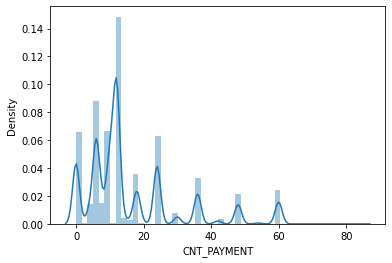

In [ ]:
# CNT_PAYMENT 
# # analysing the missing data:'CNT_PAYMENT' (//numeric data)
print(previous_application['CNT_PAYMENT'].isnull().sum())

# display summary of the column:'CNT_PAYMENT'
print(previous_application['CNT_PAYMENT'].describe())

sns.distplot(previous_application['CNT_PAYMENT'])
plt.show()

# suggestion : we can fill it with median

284349
count    427633.000000
mean     342501.815374
std       88387.570654
min       -2921.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64


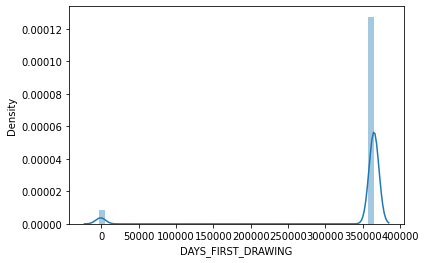

In [ ]:
#                  40.137919
#       40.137919
#                   40.137919
# DAYS_TERMINATION               40.137919
# NFLAG_INSURED_ON_APPROVAL      40.137919

# # analysing the missing data:'DAYS_FIRST_DRAWING' (//numeric data)
print(previous_application['DAYS_FIRST_DRAWING'].isnull().sum())
# print(previous_application['DAYS_FIRST_DRAWING'].head())

# display summary of the column:'DAYS_FIRST_DRAWING'
print(previous_application['DAYS_FIRST_DRAWING'].describe())

sns.distplot(previous_application['DAYS_FIRST_DRAWING'])
plt.show()

# suggestion : we can fill it with median

284349
0    -42.0
1   -134.0
2   -271.0
3   -482.0
4      NaN
Name: DAYS_FIRST_DUE, dtype: float64
count    427633.000000
mean      13685.708484
std       72118.132737
min       -2892.000000
25%       -1630.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64


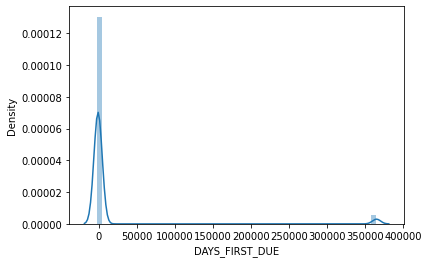

In [ ]:
# # analysing the missing data:'DAYS_FIRST_DUE' (//numeric data)
print(previous_application['DAYS_FIRST_DUE'].isnull().sum())
print(previous_application['DAYS_FIRST_DUE'].head())

# display summary of the column:'DAYS_FIRST_DUE'
print(previous_application['DAYS_FIRST_DUE'].describe())

sns.distplot(previous_application['DAYS_FIRST_DUE'])
plt.show()

# # suggestion : we can fill it with median

284349
count    427633.000000
mean      33367.611908
std      106302.478651
min       -2801.000000
25%       -1247.000000
50%        -364.000000
75%         126.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64


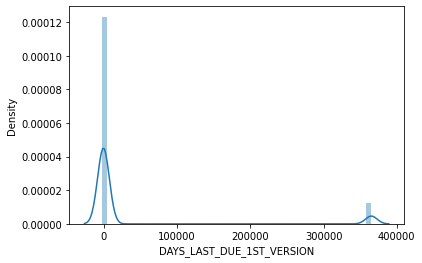

In [ ]:
# # analysing the missing data:'DAYS_LAST_DUE_1ST_VERSION' (//numeric data)
print(previous_application['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum())
# print(previous_application['DAYS_LAST_DUE_1ST_VERSION'].head())

# display summary of the column:'DAYS_LAST_DUE_1ST_VERSION'
print(previous_application['DAYS_LAST_DUE_1ST_VERSION'].describe())

sns.distplot(previous_application['DAYS_LAST_DUE_1ST_VERSION'])
plt.show()

# suggestion : we can fill it with median

284349
count    427633.000000
mean      76444.659481
std      149551.862132
min       -2889.000000
25%       -1318.000000
50%        -539.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64


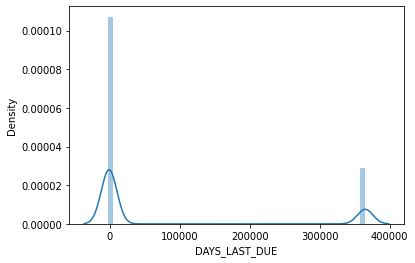

In [ ]:
# # analysing the missing data:'DAYS_LAST_DUE' (//numeric data)
print(previous_application['DAYS_LAST_DUE'].isnull().sum())
# print(previous_application['DAYS_LAST_DUE'].head())

# display summary of the column:'DAYS_LAST_DUE'
print(previous_application['DAYS_LAST_DUE'].describe())

sns.distplot(previous_application['DAYS_LAST_DUE'])
plt.show()

# suggestion : we can fill it with median

284349
0       -37.0
1    365243.0
2    365243.0
3      -177.0
4         NaN
Name: DAYS_TERMINATION, dtype: float64
count    427633.000000
mean      81781.932980
std      153167.635647
min       -2874.000000
25%       -1274.000000
50%        -501.000000
75%         -45.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64


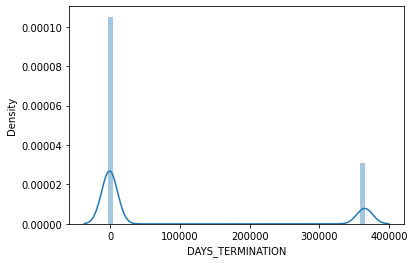

In [ ]:


# # analysing the missing data:'DAYS_TERMINATION' (//numeric data)
print(previous_application['DAYS_TERMINATION'].isnull().sum())
print(previous_application['DAYS_TERMINATION'].head())

# display summary of the column:'DAYS_TERMINATION'
print(previous_application['DAYS_TERMINATION'].describe())

sns.distplot(previous_application['DAYS_TERMINATION'])
plt.show()

# suggestion : we can fill it with median

In [ ]:
# # analysing the missing data:'NFLAG_INSURED_ON_APPROVAL' (//categorical data)
print(previous_application['NFLAG_INSURED_ON_APPROVAL'].isnull().sum())
# print(previous_application['NFLAG_INSURED_ON_APPROVAL'].head())

# display summary of the column:'NFLAG_INSURED_ON_APPROVAL'
print(previous_application['NFLAG_INSURED_ON_APPROVAL'].value_counts())


# suggestion : we can fill it with mode = 0

284349
0.0    286272
1.0    141361
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64


In [ ]:
previous_application.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    157665
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_GOODS_PRICE                162744
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                349429
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 1
NAME_PORTFOLIO                      1
NAME_PRODUCT_TYPE                   1
CHANNEL_TYPE                        1
SELLERPLACE_AREA                    1
NAME_SELLER_INDUSTRY                1
CNT_PAYMENT                    157663
NAME_YIELD_GROUP                    1
PRODUCT_COMB

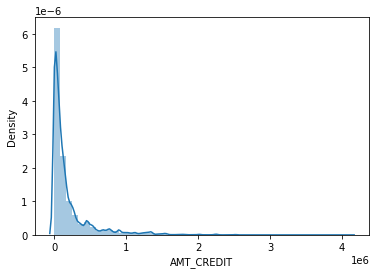

In [ ]:
sns.distplot(previous_application['AMT_CREDIT'])
plt.show()

In [ ]:
# # analysing the missing data:'PRODUCT_COMBINATION' (//categorical data)
print(previous_application['PRODUCT_COMBINATION'].isnull().sum())
# print(previous_application['PRODUCT_COMBINATION'].head())

# display summary of the column:'PRODUCT_COMBINATION'
print(previous_application['PRODUCT_COMBINATION'].value_counts())


# suggestion : we can fill it with mode

139
Cash                              120573
POS household with interest       114494
POS mobile with interest           95224
Cash X-Sell: middle                60344
Cash X-Sell: low                   54459
Card Street                        48048
POS industry with interest         42775
POS household without interest     35916
Card X-Sell                        34147
Cash Street: high                  25046
Cash X-Sell: high                  24810
Cash Street: middle                14652
Cash Street: low                   14304
POS other with interest            10296
POS mobile without interest        10237
POS industry without interest       5401
POS others without interest         1117
Name: PRODUCT_COMBINATION, dtype: int64


In [ ]:
# segregating categorical and numerical column from previous application

# get the categorical columns from the data
catCols = previous_application.select_dtypes('object').columns
print('categorical columns',catCols,len(catCols))
print('*'*80)

# get numerical columns from the data
numCols = previous_application.select_dtypes('number').columns
print('numeric columns',numCols,len(numCols))
print('*'*80)

categorical columns Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object') 16
********************************************************************************
numeric columns Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object') 17
****************************************************

# Analyse the 'application_data'

In [48]:
# analyse the missing data in application_data
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [49]:
# analyse the percentage of missing data in application_data
application_data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [52]:
# removing columns having missing data > 40%
application_data = application_data.drop(['OWN_CAR_AGE','EXT_SOURCE_1','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE'],axis = 1)

In [53]:
# analyse the percentage of missing data in application_data
application_data.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

12
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


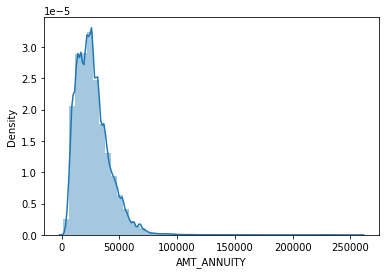

In [59]:
# # analysing the missing data:'AMT_ANNUITY' (//numerical data)
print(application_data['AMT_ANNUITY'].isnull().sum())
# print(application_data['AMT_ANNUITY'].head())

# display summary of the column:'AMT_ANNUITY'
print(application_data['AMT_ANNUITY'].describe())

sns.distplot(application_data['AMT_ANNUITY'])
plt.show()

# suggestion : we can fill it with median

278
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


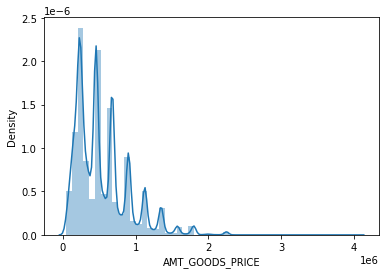

In [61]:
# # analysing the missing data:'AMT_GOODS_PRICE' (//numerical data)
print(application_data['AMT_GOODS_PRICE'].isnull().sum())
# print(application_data['AMT_GOODS_PRICE'].head())

# display summary of the column:'AMT_GOODS_PRICE'
print(application_data['AMT_GOODS_PRICE'].describe())

sns.distplot(application_data['AMT_GOODS_PRICE'])
plt.show()

# suggestion : we can fill it with median

In [63]:
# # analysing the missing data:'NAME_TYPE_SUITE' (//categorical data)
print(application_data['NAME_TYPE_SUITE'].isnull().sum())
print(application_data['NAME_TYPE_SUITE'].head())

# # display summary of the column:'NAME_TYPE_SUITE'
print(application_data['NAME_TYPE_SUITE'].value_counts())



# # suggestion : we can fill it with mode:Unaccompanied

1292
0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


In [65]:
# # analysing the missing data:'OCCUPATION_TYPE' (//categorical data)
print(application_data['OCCUPATION_TYPE'].isnull().sum())
print(application_data['OCCUPATION_TYPE'].head())

# display summary of the column:'NAME_TYPE_SUITE'
print(application_data['OCCUPATION_TYPE'].value_counts())



# # suggestion : we can fill it with mode:Laborers

96391
0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


In [66]:
# # analysing the missing data:'OCCUPATION_TYPE' (//categorical data)
print(application_data['OCCUPATION_TYPE'].isnull().sum())
print(application_data['OCCUPATION_TYPE'].head())

# display summary of the column:'NAME_TYPE_SUITE'
print(application_data['OCCUPATION_TYPE'].value_counts())



# # suggestion : we can fill it with mode:Laborers

96391
0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


In [82]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].nunique()

25

660
count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


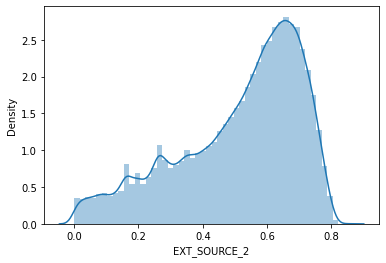

In [83]:
# # analysing the missing data:'EXT_SOURCE_2' (//numerical data)
print(application_data['EXT_SOURCE_2'].isnull().sum())
# print(application_data['EXT_SOURCE_2'].head())

# display summary of the column:'EXT_SOURCE_2'
print(application_data['EXT_SOURCE_2'].describe())

sns.distplot(application_data['EXT_SOURCE_2'])
plt.show()

# suggestion : we can fill it with median

60965
count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


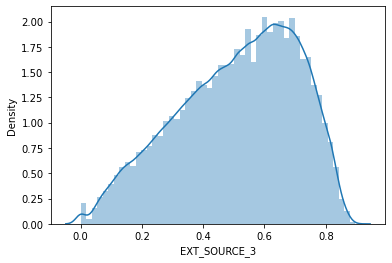

In [84]:
# # analysing the missing data:'EXT_SOURCE_3' (//numerical data)
print(application_data['EXT_SOURCE_3'].isnull().sum())
# print(application_data['EXT_SOURCE_3'].head())

# display summary of the column:'EXT_SOURCE_3'
print(application_data['EXT_SOURCE_3'].describe())

sns.distplot(application_data['EXT_SOURCE_3'])
plt.show()

# suggestion : we can fill it with median

In [85]:
# for categorical columns 
for i in ['CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']:
  print(application_data[i].isnull().sum())
  print(application_data[i].head())

  # display summary of the column:'NAME_TYPE_SUITE'
  print(application_data[i].value_counts())



# # suggestion : we can fill it with mode:Laborers

2
0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
Name: CNT_FAM_MEMBERS, dtype: float64
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64
1021
0    2.0
1    1.0
2    0.0
3    2.0
4    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64
0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1